**Eshal Khan**

**SP23-BCS-095**

**Lab Final**

**Question no 1**

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Preprocessing**

**a) Handle Missing Values**

In [3]:
# Fill missing Age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)


/tmp/ipython-input-2304696240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-2304696240.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

**b) Encode Categorical Features**

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


**c) Normalize the Data**

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


**Step 3: Train-Test Split**

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Step 4: Train ML Model (Logistic Regression)**

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

**Step 5: Model Evaluation**

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


**Step 6: Display Results in DataFrame**

In [9]:
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy, precision, recall, f1]
})

results


,Metric,Score
0,Accuracy,0.810056
1,Precision,0.785714
2,Recall,0.743243
3,F1-Score,0.763889


**Question no 2**

**Deep Learning Model Implementation**

**Model Used: CNN**

Step 1: Load CIFAR-10 Dataset

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Step 2: Build CNN Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Step 3: Train the Model

In [12]:
history = cnn_model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=64
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 81ms/step - accuracy: 0.2820 - loss: 1.9356 - val_accuracy: 0.4932 - val_loss: 1.4262
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.4664 - loss: 1.4663 - val_accuracy: 0.5685 - val_loss: 1.2469
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.5347 - loss: 1.3061 - val_accuracy: 0.6035 - val_loss: 1.1424
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 83ms/step - accuracy: 0.5730 - loss: 1.1952 - val_accuracy: 0.6251 - val_loss: 1.0911
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 78ms/step - accuracy: 0.5979 - loss: 1.1423 - val_accuracy: 0.6468 - val_loss: 1.0037
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.6141 - loss: 1.0954 - val_accuracy: 0.6581 - val_loss: 0.9849
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6328 - loss: 1.0446 - val_accuracy: 0.6634 - val_loss: 0.9615
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 0.6466 - loss: 1.0002 -

**Step 4: Plot Loss & Accuracy Graphs**

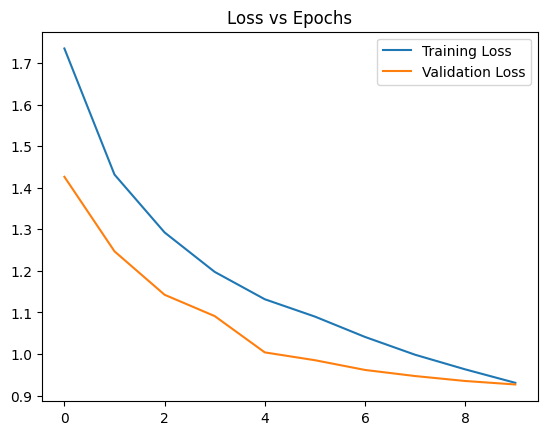

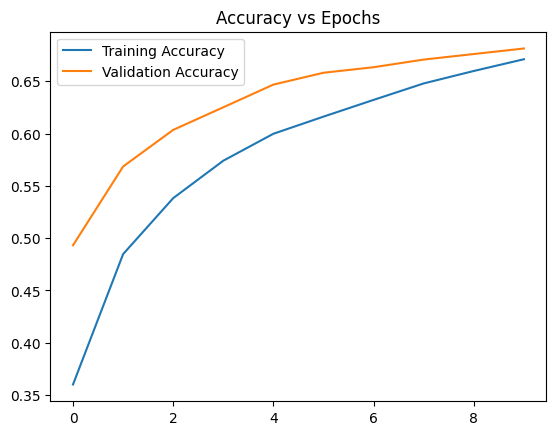

In [13]:
import matplotlib.pyplot as plt

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss vs Epochs")
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy vs Epochs")
plt.show()


**Question no 3**

**Chosen Hybrid: ANN + Random Forest (DL + ML)**

**Load CIFAR-10 and Preprocess**

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images for ANN input
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)



Step 2: Build an ANN for Feature Extraction

In [16]:
# Simple ANN to extract features
ann_model = Sequential([
    Dense(512, activation='relu', input_shape=(32*32*3,)),
    Dense(256, activation='relu'),  # Feature layer
])

# Build the model (fix input shape issue)
ann_model.build(input_shape=(None, 32*32*3))

# Generate features
train_features = ann_model.predict(x_train_flat)
test_features = ann_model.predict(x_test_flat)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Step 3: Train Random Forest on Extracted Features

In [17]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features, y_train.ravel())


RandomForestClassifier(random_state=42)

**Step 4: Evaluate the Hybrid Model**

In [18]:
# Predictions
rf_pred = rf_model.predict(test_features)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)

print(f"Hybrid Model Accuracy: {rf_accuracy}")
print("Confusion Matrix:\n", conf_matrix)


Hybrid Model Accuracy: 0.3931
Confusion Matrix:
 [[510  51  57  13  30  29  24  31 180  75]
 [ 48 419  13  48  15  41  76  39  92 209]
 [125  47 251  69 156  76 134  63  40  39]
 [ 57  57  76 208  75 197 127  87  26  90]
 [ 58  25 136  55 362  61 148  80  37  38]
 [ 38  38  93 123  74 361  99  80  39  55]
 [ 31  43  97  64 139  81 431  52  13  49]
 [ 53  69  53  66 119  80  62 340  37 121]
 [108  87  18  44  17  46   9  22 556  93]
 [ 50 159  17  40  19  28  37  57 100 493]]


**Step 5: Compare with CNN Model from Q2**

In [19]:
# Assuming cnn_model from Q2 is already trained
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)

import pandas as pd

comparison = pd.DataFrame({
    "Model": ["CNN (Q2)", "ANN + Random Forest (Hybrid)"],
    "Accuracy": [cnn_test_accuracy, rf_accuracy]
})

comparison


,Model,Accuracy
0,CNN (Q2),0.6788
1,ANN + Random Forest (Hybrid),0.3931
